# Asuntojen hintakehitys (2000-2016) - Helsinki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Luetaan data
df=pd.read_excel('./Asuntojen_hinnat_postinumeroalueittain.xlsx')

#df2 Vuosi, sekä neliöhinta omiin sarakkeisiinsa. df3 perustaulukko ilman Toimipaikka saraketta
df2=pd.melt(df,id_vars=['Toimipaikka'],var_name='Vuosi',value_name='Hinta')
df3=df.iloc[:,1:]

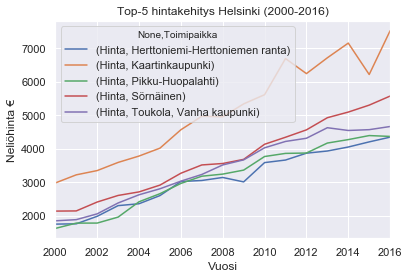

Toimipaikka Hinta         Indeksi
Vuosi                                  2000  2016          
39                   Pikku-Huopalahti  1632  4373  2.679534
54                          Sörnäinen  2148  5575  2.595438
9                     Kaartinkaupunki  2986  7521  2.518754
59            Toukola, Vanha kaupunki  1858  4668  2.512379
6      Herttoniemi-Herttoniemen ranta  1760  4351  2.472159

In [2]:
#Haetaan top-5 alueet
indeksi=df2.loc[df2['Vuosi'].isin([2000,2016])]
indeksi=indeksi.pivot_table(df2,index='Toimipaikka',columns='Vuosi').reset_index()
indeksi['Indeksi']=indeksi['Hinta'][2016]/indeksi['Hinta'][2000]
indeksi=indeksi.sort_values(by='Indeksi',ascending=False)
indeksi=indeksi.head()

#Piirretään kuvaaja top-5 alueista
top5=df2.loc[df2['Toimipaikka'].isin(indeksi.Toimipaikka)]
top5.pivot_table(top5, index='Vuosi', columns='Toimipaikka').plot()
plt.rcParams["figure.figsize"]=10,5
plt.ylabel('Neliöhinta €')
plt.title('Top-5 hintakehitys Helsinki (2000-2016)')
plt.show()

indeksi.head()

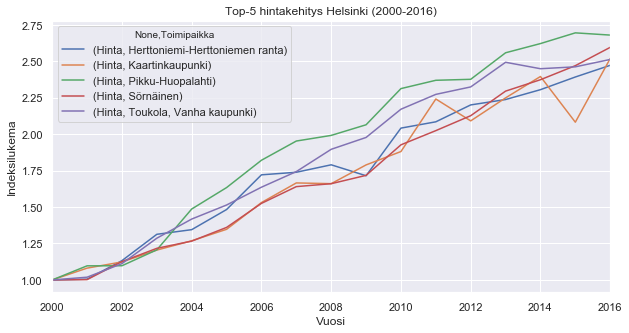

,Toimipaikka,Vuosi,Indeksilukema
1038,Pikku-Huopalahti,2016,2.679534
1050,Sörnäinen,2016,2.595438
1026,Kaartinkaupunki,2016,2.518754
1055,"Toukola, Vanha kaupunki",2016,2.512379
1074,Herttoniemi-Herttoniemen ranta,2016,2.472159


In [3]:
#Lasketaan indeksilukema ilman toimipaikka saraketta
indeksi=df[list(df3)].div(df[2000], axis=0)

#Lisätään toimipaikka sarake
indeksi['Toimipaikka']=df['Toimipaikka']

#Siirretään toimipaikka taulukon ensimmäiseksi sarakkeeksi
cols = indeksi.columns.tolist()
cols.insert(0, cols.pop(cols.index('Toimipaikka')))
indeksi = indeksi.reindex(columns= cols)

#valikoidaan top 5 alueet
indeksi=pd.melt(indeksi,id_vars='Toimipaikka',var_name='Vuosi',value_name='Hinta')
i=indeksi.sort_values(by=['Vuosi','Hinta'],ascending=False)
i=i.head()
i=list(i.Toimipaikka)
indeksi=indeksi.loc[indeksi['Toimipaikka'].isin(i)]

#Piirretään kuvaaja
indeksi.pivot_table(indeksi,index='Vuosi',columns='Toimipaikka').plot()
plt.rcParams["figure.figsize"]=10,5
plt.ylabel('Indeksilukema')
plt.title('Top-5 hintakehitys Helsinki (2000-2016)')
plt.show()
#Taulukkomuodossa
indeksi=indeksi.rename(columns={'Hinta':'Indeksilukema'})
indeksi.loc[indeksi.Vuosi==2016].sort_values(by='Indeksilukema',ascending=False)